<a href="https://colab.research.google.com/github/jaeyoonjeong9024/5weeks/blob/main/BMI_PREDICT_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models


In [15]:
# 1. 데이터 준비
print("=" * 60)
print("📊 Loading Data")
print("=" * 60)

df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

X = df.drop(columns=["BMI", "Outcome"])
y = df["BMI"]

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print(f"Features: {list(X.columns)}\n")


📊 Loading Data
Train: (614, 7), Test: (154, 7)
Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']



In [16]:
# 2. DNN 모델 구성
print("=" * 60)
print("🧠 Building DNN Model")
print("=" * 60)

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # 회귀: 출력 1개, 활성화 함수 없음
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print(model.summary())

🧠 Building DNN Model


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
# 3. 모델 학습
print("\n" + "=" * 60)
print("🔥 Training...")
print("=" * 60)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


🔥 Training...
Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1060.7791 - mae: 31.5981 - val_loss: 1055.4814 - val_mae: 31.7370
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 982.0321 - mae: 30.4497 - val_loss: 989.6378 - val_mae: 30.6940
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 906.2668 - mae: 29.2839 - val_loss: 880.5060 - val_mae: 28.8715
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 807.7252 - mae: 27.4124 - val_loss: 704.8387 - val_mae: 25.6300
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 622.4336 - mae: 24.0413 - val_loss: 454.4392 - val_mae: 20.0766
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 363.9445 - mae: 17.6127 - val_loss: 205.7861 - val_mae: 12.2636
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 169.4115 - mae: 10.7327 - val_loss: 103.3929 - val_mae: 7.8347
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 129.4473 - mae: 8.7438 - val_loss: 90.5017 - val_mae: 7.2706
Ep

In [18]:
# 4. 모델 평가
print("\n" + "=" * 60)
print("📈 Evaluation Results")
print("=" * 60)

y_pred = model.predict(X_test, verbose=0).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")



📈 Evaluation Results
MAE:  5.421
RMSE: 7.905
R²:   0.121



📊 Visualizing Training Progress


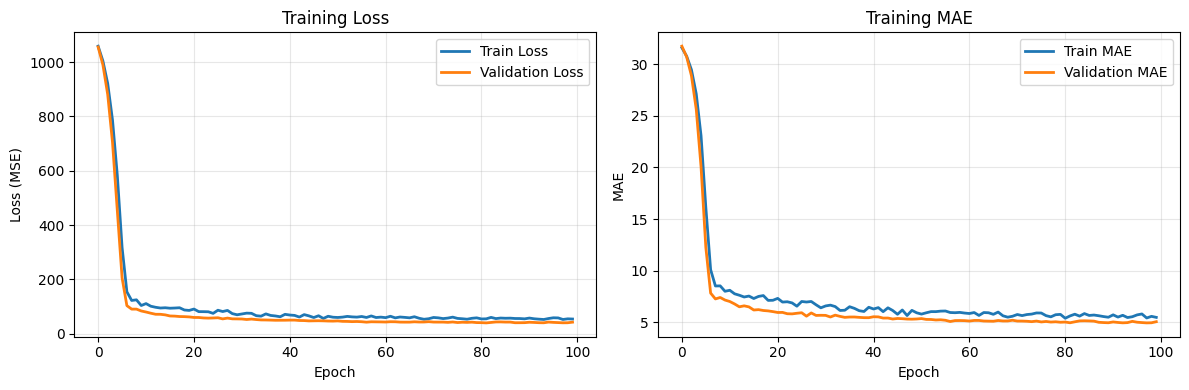

In [19]:
# 5. 학습 곡선 시각화
print("\n" + "=" * 60)
print("📊 Visualizing Training Progress")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].set_title('Training Loss')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].plot(history.history['mae'], label='Train MAE', linewidth=2)
axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].set_title('Training MAE')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [20]:
# 6. 예측 결과 비교
print("\n" + "=" * 60)
print("🔍 Sample Predictions")
print("=" * 60)

sample_indices = np.random.choice(len(y_test), 10, replace=False)
print(f"{'Actual':<10} {'Predicted':<10} {'Error'}")
print("-" * 35)
for idx in sample_indices:
    actual = y_test.iloc[idx]
    predicted = y_pred[idx]
    error = abs(actual - predicted)
    print(f"{actual:<10.2f} {predicted:<10.2f} {error:.2f}")

print("\n✅ Done!")


🔍 Sample Predictions
Actual     Predicted  Error
-----------------------------------
43.40      33.76      9.64
24.60      29.75      5.15
29.50      28.38      1.12
37.20      31.47      5.73
42.10      30.01      12.09
33.70      26.25      7.45
28.00      36.22      8.22
31.90      27.18      4.72
37.70      31.02      6.68
30.90      29.99      0.91

✅ Done!
